# 확률의 개념과 특징

## 집합과 원소

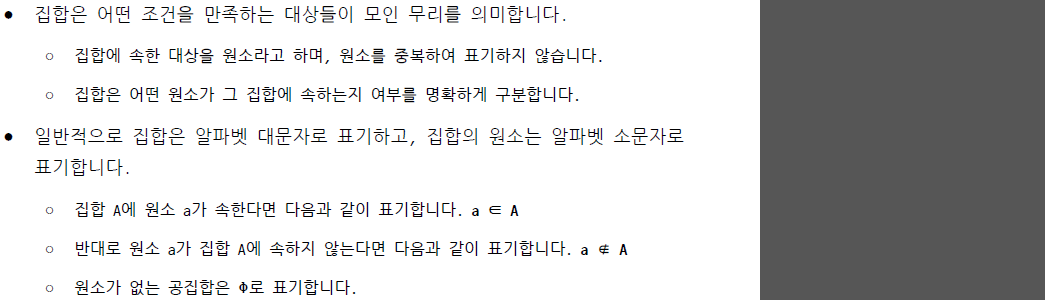

## 벤다이어그램

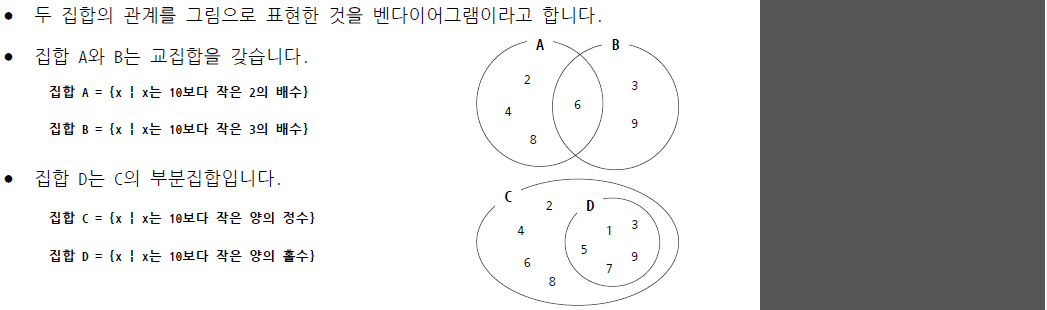

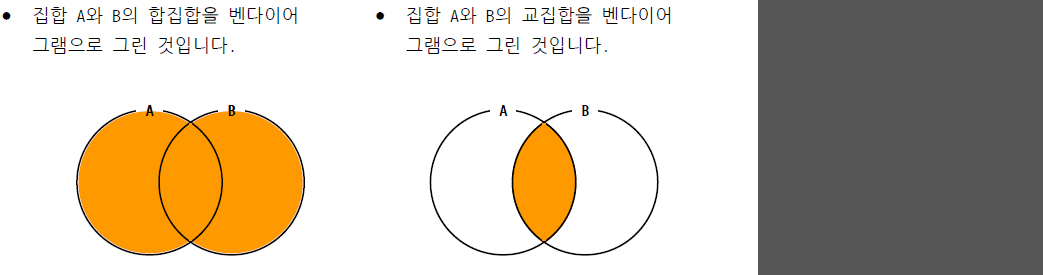

## 집합의 관계

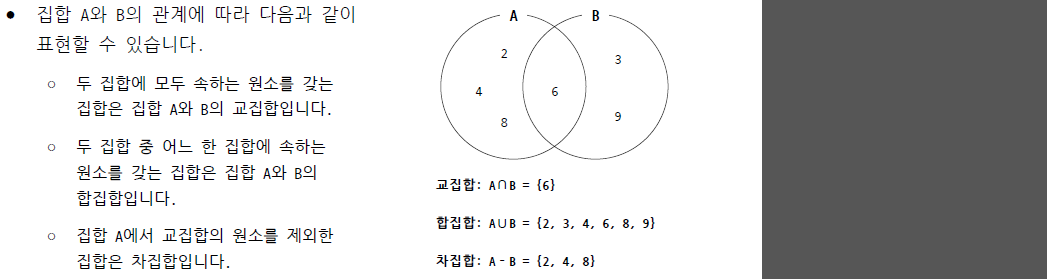

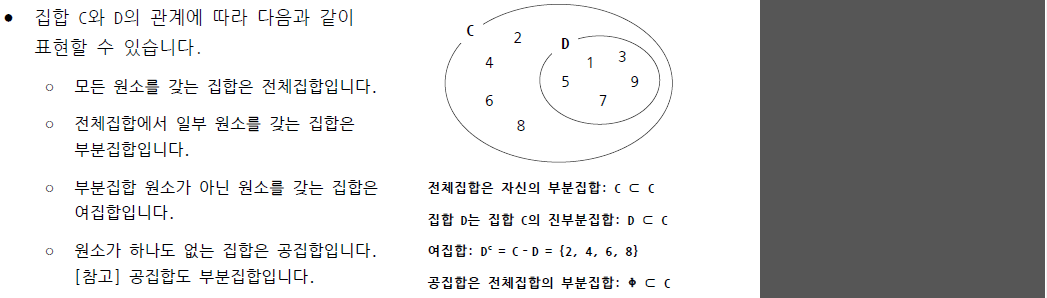

## 확률 관련 용어

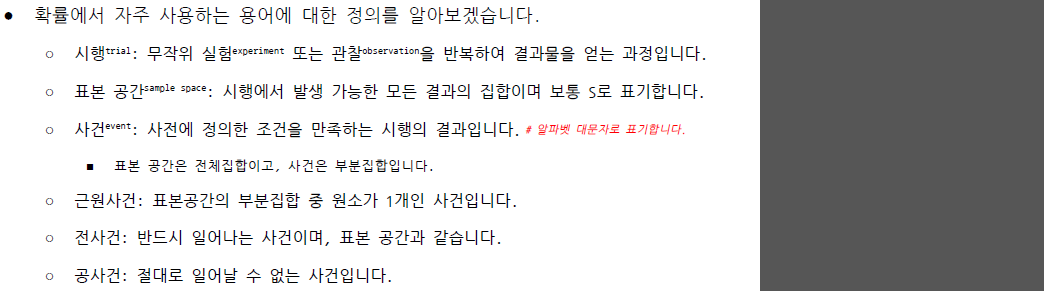

## 확률

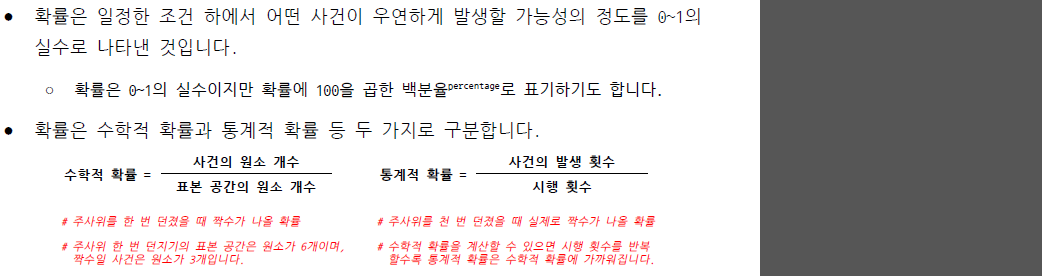

## [참고] 수학적 확률의 시각적 예시

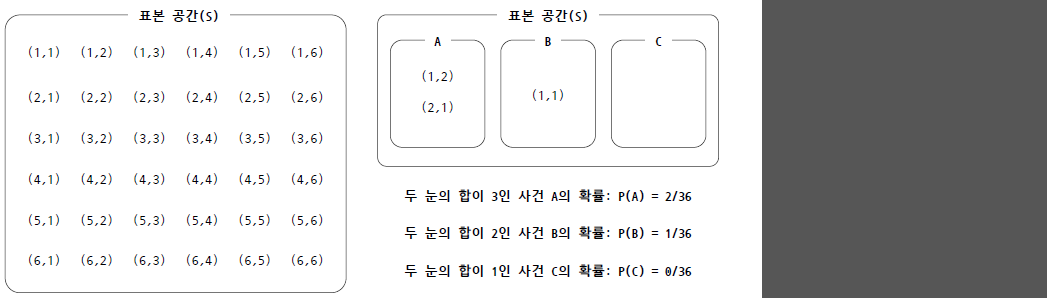

## 확률의 성질

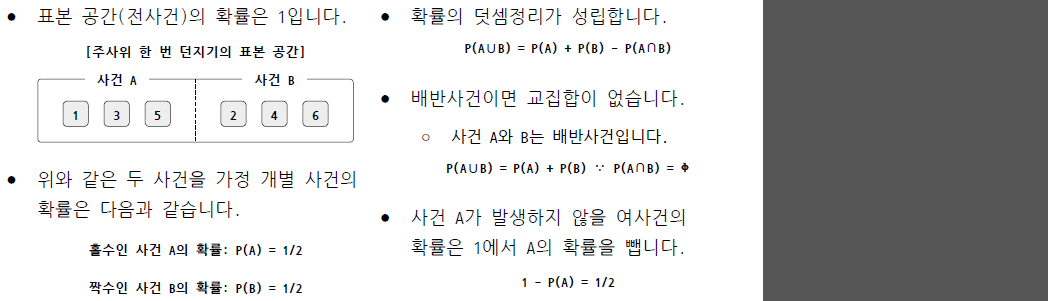

## 조건부 확률

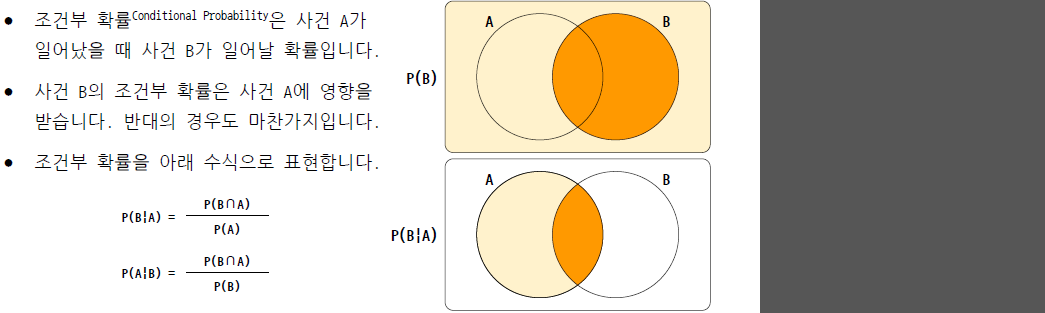

## 독립과 종속

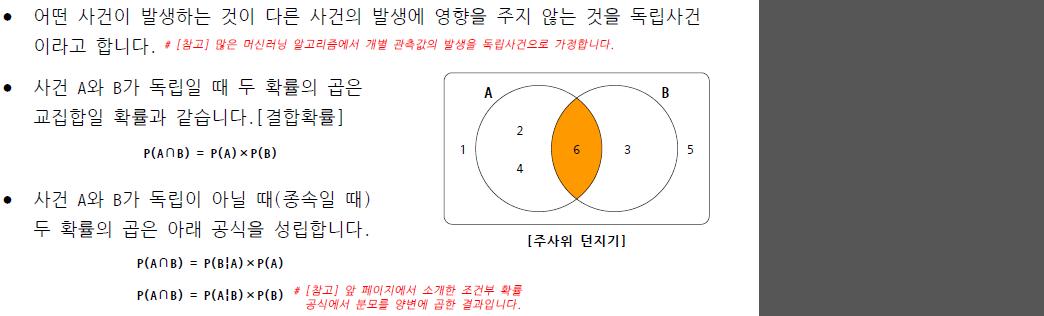

## 베이즈 정리

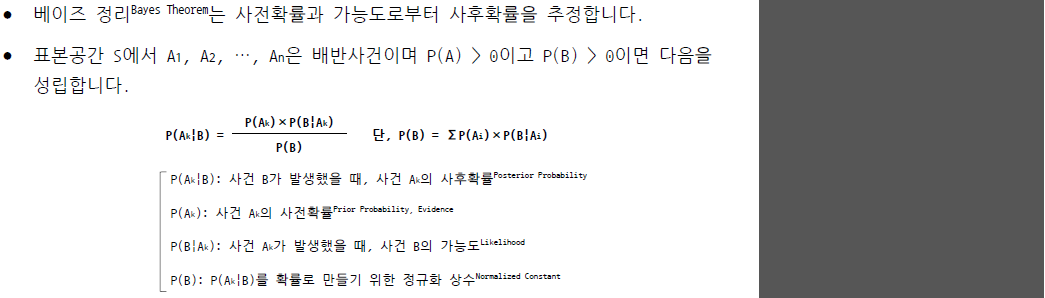

## 베이즈 정리 관련 용어

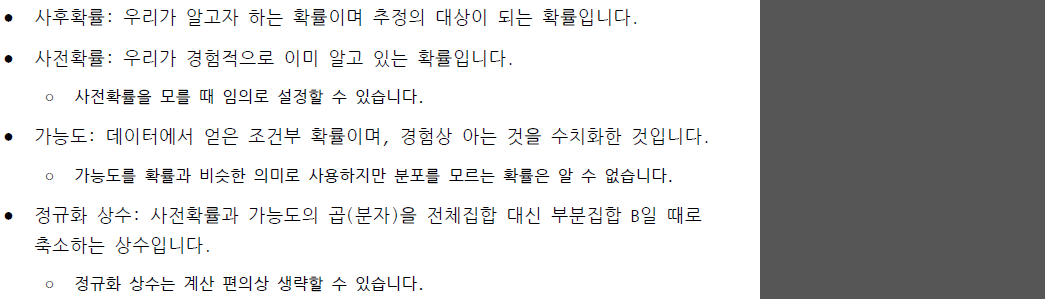

## 베이즈 정리의 시각적 예시

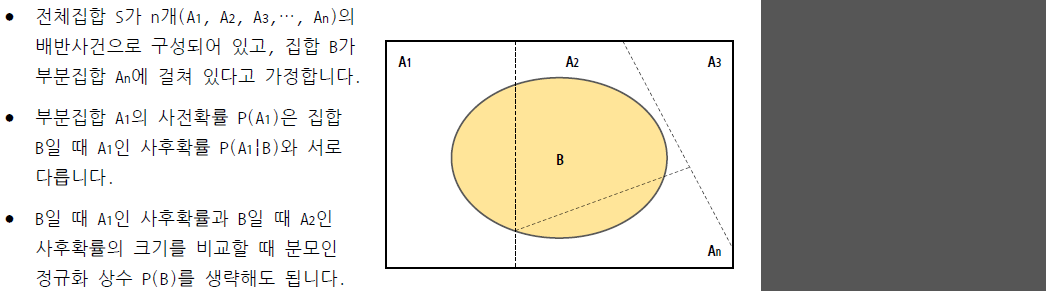

## 영화 리뷰로 베이즈 정리 이해하기

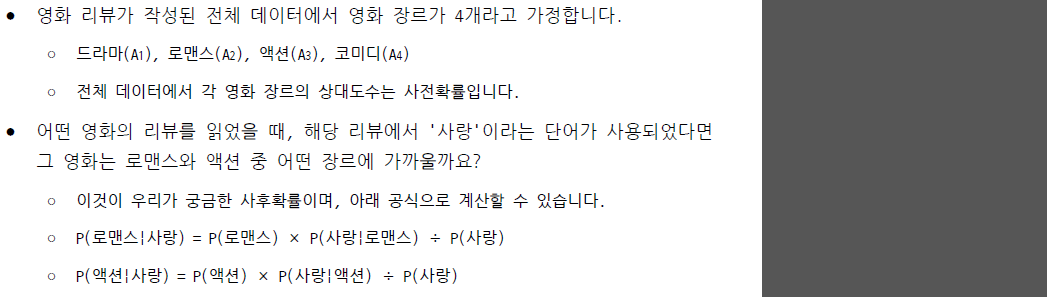

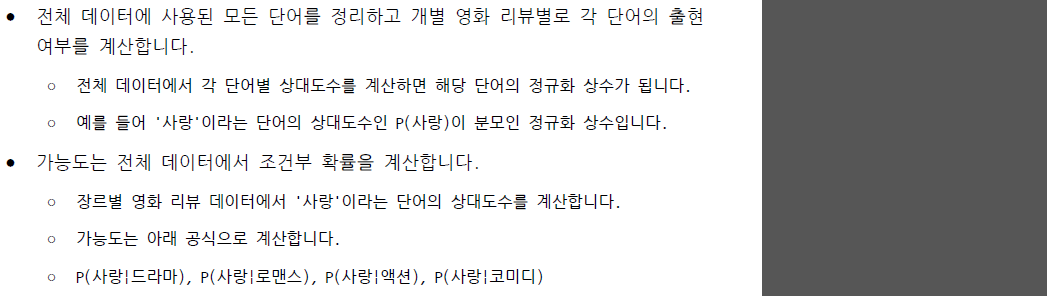

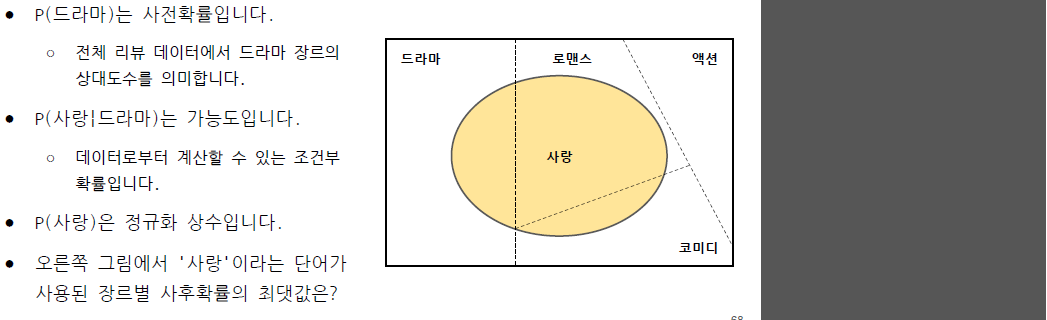

# 확률분포의 이해

## 확률변수

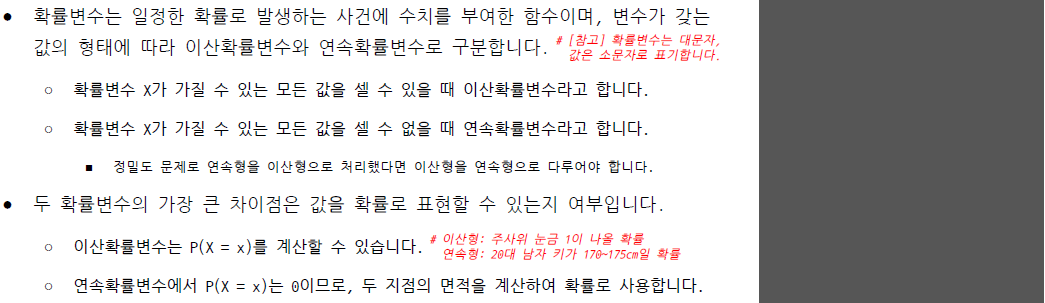

## 이산확률분포

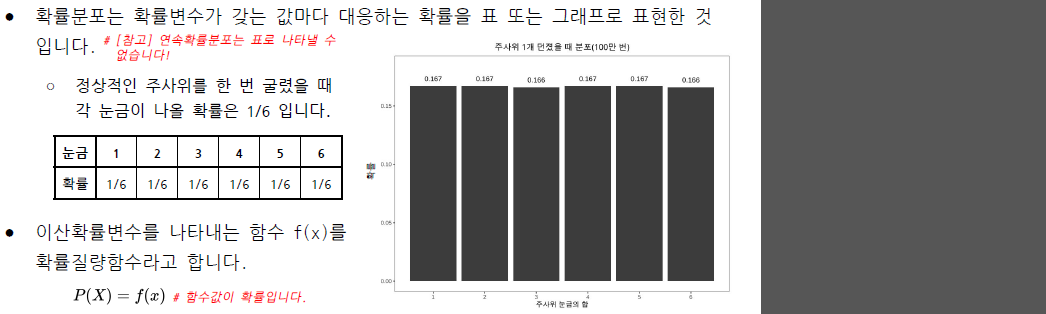

## [참고] 주사위 던진 횟수를 늘리면?

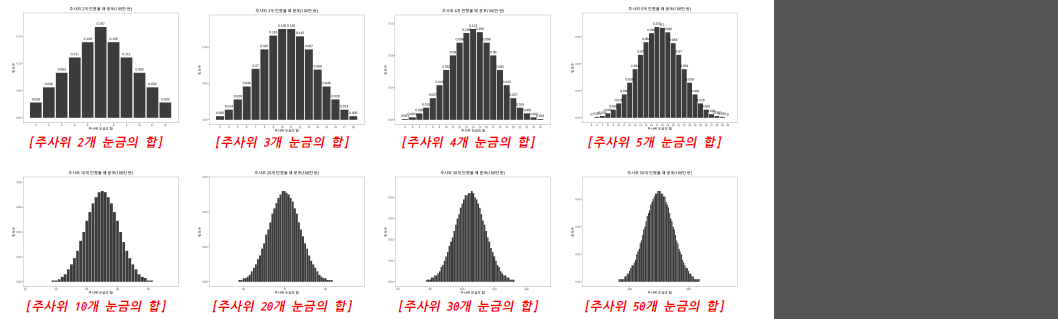

## [참고] 표본평균에 관한 두 개의 정리

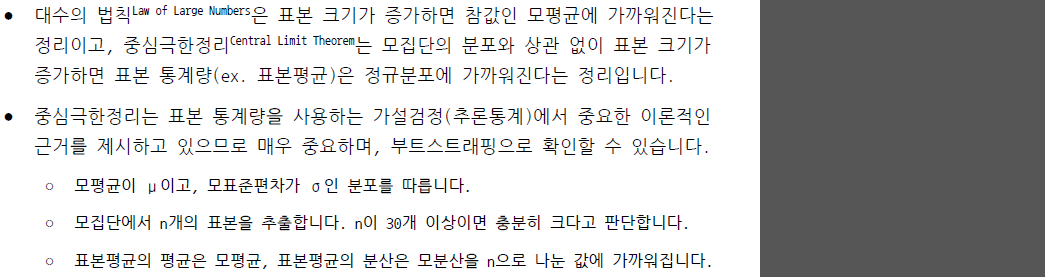

## [참고] 부트스트래핑

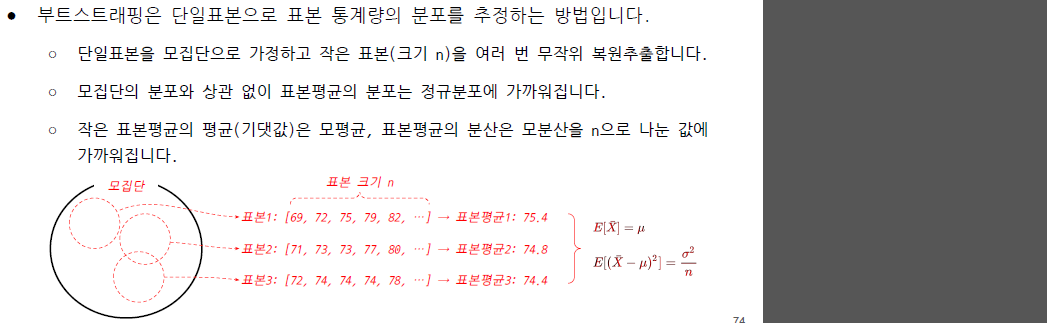

## 연속확률분포

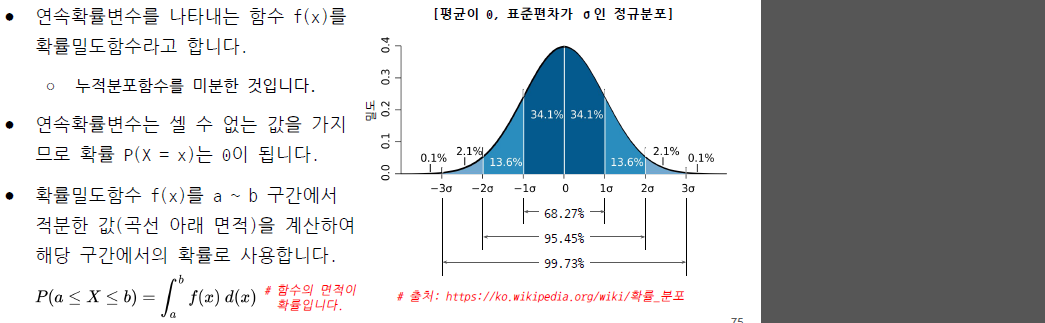

## 정규분포

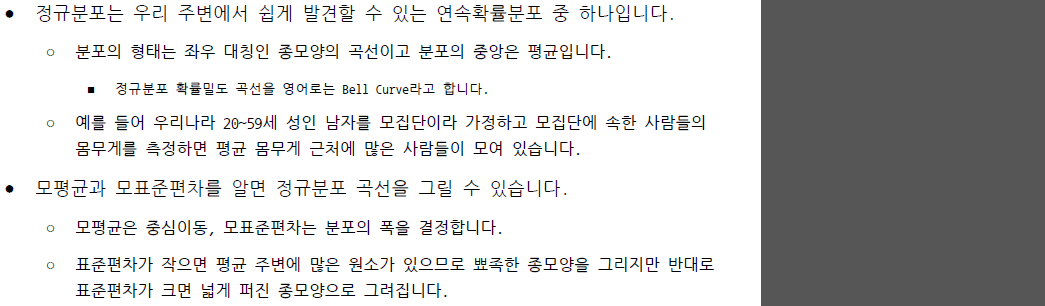

## 정규분포의 예시

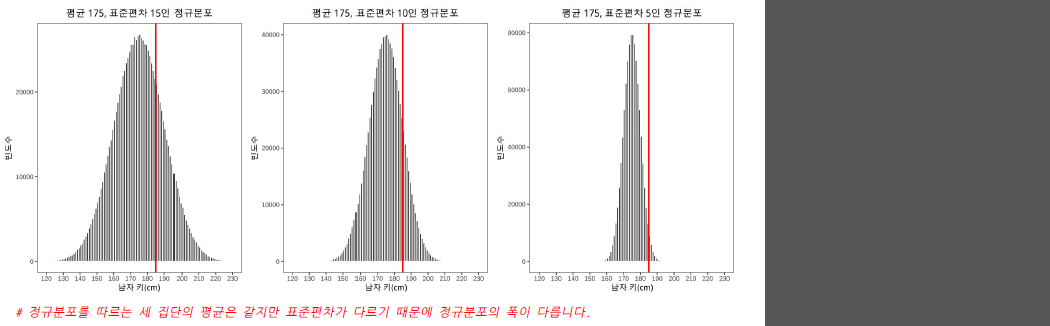

## 관련 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [1]:
import os
import joblib
import numpy as np
import pandas as pd

### ● 실수를 출력할 소수점 자리수를 설정합니다

In [2]:
%precision 3
pd.options.display.precision = 3

### ● 통계 관련 라이브러리를 호출합니다

In [4]:
from scipy import stats
from statsmodels import robust

### ● 시각화 및 통계 분석 관련 모듈을 호출합니다

In [5]:
from GraphicSetting import *
import HelloDataScience as hds

## 정규분포를 따르는 무작위 값 생성

### ● 시드를 고정합니다

In [6]:
np.random.seed(seed = 1234) # 시드에 같은 값을 지정하면 항상 같은 결과를 얻습니다.
# [참고] 아래 함수에 random_state = 1234를 추가한 것과 같습니다.

### ● 평균이 175, 표준편차가 5인 정규분포를 따르는 무작위 표본을 생성합니다

In [7]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000) # 샘플 사이즈가 커질수록 모평균에 가까워진다

### ● height(표본)의 평균과 표준편차를 출력합니다

In [15]:
heights.mean() # height(표본)의 평균은 모평균일 175에 가깝습니다.
# [참고] 표본 크기가 증가할수록 표본평균은 모평균에 더 가까워집니다.

175.147

In [8]:
heights.std() # height(표본)의 표준편차는 모표준편차인 5에 가깝습니다.
# [참고] 표본 크기가 증가할수록 표본표준편차도 모표준편차에 더 가까워집니다.

4.959

## [참고] 정규분포 시각화

In [ ]:
# 평균이 같고 표준편차가 다른 정규분포 확률밀도곡선을 시각화합니다.
sp1 = stats.norm.rvs(loc = 175, scale = 15, size = 100000)
sp2 = stats.norm.rvs(loc = 175, scale = 10, size = 100000)
sp3 = stats.norm.rvs(loc = 175, scale = 5, size = 100000)
sns.kdeplot(x = sp1, label = 'Std: 15')
sns.kdeplot(x = sp2, label = 'Std: 10')
sns.kdeplot(x = sp3, label = 'Std: 5')
plt.legend();

## 정규분포 확률밀도

### ● 다양한 정규분포에서 확률변수값 175의 확률밀도(높이)를 비교합니다.

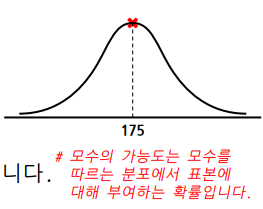

In [17]:
stats.norm.pdf(x = 175, loc = 175, scale = 15) # 평균이 175, 표준편차가 15인 정규분포에서 확률변수값 175의 확률밀도(높이)를 반환합니다.

0.027

In [20]:
stats.norm.pdf(x = 175, loc = 175, scale = 15) * 1000000

26596.152

In [22]:
stats.norm.pdf(x = 175, loc = 175, scale = 10) # 평균이 175, 표준편차가 10인 정규분포에서 확률변수값 175의 확률밀도(높이)를 반환합니다.

0.040

In [24]:
stats.norm.pdf(x = 175, loc = 175, scale = 10) * 1000000

39894.228

In [26]:
# 평균이 175, 표준편차가 5인 정규분포에서 확률변수값 175의 확률밀도(높이)를 반환합니다.
stats.norm.pdf(x = 175, loc = 175, scale = 5)

0.080

In [29]:
stats.norm.pdf(x = 175, loc = 175, scale = 5) * 1000000

79788.456

In [8]:
stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5)

array([0.078, 0.08 , 0.078])

### ● 정규분포 확률밀도는 표본에 대한 모수의 가능도(likeihood)입니다.

In [39]:
stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5).prod()
# 174, 175, 176을 만날 확률은 174 만날확률, 175 만날확률, 176 말날확률을 곱함

0.000

In [40]:
# 모평균이 173인 정규분포에서 표본이 추출될 확률(로그 가능도 합)을 계산합니다.
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 173, scale = 5)).sum()
# log data임

-7.865

In [34]:
# 모평균이 174인 정규분포에서 표본이 추출될 확률(로그 가능도 합)을 계산합니다.
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 174, scale = 5)).sum()

-7.685

In [41]:
# 모평균이 175인 정규분포에서 표본이 추출될 확률(로그 가능도 합)을 계산합니다.
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5)).sum()

-7.625

## 정규분포 누적확률

### ● 다양한 정규분포에서 확률변수값 185의 누적확률을 반환합니다

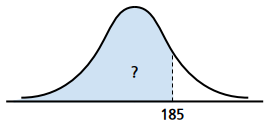

In [42]:
# 평균이 175, 표준편차가 15인 정규분포에서 확률변수값 185의 누적확률을 반환합니다.
stats.norm.cdf(x = 185, loc = 175, scale = 15)
# 누적확률 : x에 대한 누적확률을 알려주는 것임
# pdf : 확률밀도함수(높이(밀도))

0.748

In [43]:
# 평균이 175, 표준편차가 10인 정규분포에서 확률변수값 185의 누적확률을 반환합니다.
stats.norm.cdf(x = 185, loc = 175, scale = 10)

0.841

In [49]:
# 평균이 175, 표준편차가 5인 정규분포에서 확률변수값 185의 누적확률을 반환합니다.
stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.977

In [51]:
np.diff(stats.norm.cdf(x = [165, 185], loc = 175, scale = 5))[0]

0.954

In [9]:
np.diff(stats.norm.cdf(x = [165, 185], loc = 175, scale = 10))[0]

0.683

### ● 두 확률변수값 사이의 확률을 계산합니다

In [45]:
# 두 지점 간 확률을 계산하려면 x 매개변수에 원소가 2개인 리스트를 할당합니다.
cdfs = stats.norm.cdf(x = [165, 185], loc = 175, scale = 5)
                            # x 매개변수에 원소가 2개인 리스트를 할당하면
                            # 해당 확률변수값의 누적확률을 반환합니다.
cdfs

array([0.023, 0.977])

In [53]:
# 두 확률변수값 사이의 확률을 계산합니다.
np.diff(a = cdfs)[0]
# 평균에서 쁠마2 표준편차 구간의 확률을 계산합니다.
# [참고] cdfs는 numpy.ndarray이므로 diff() 방식이 없습니다.

0.954

## 정규분포 확률변수값

### ● 다양한 정규분포에서 지정한 누적확률에 해당하는 확률변수값을 반환합니다

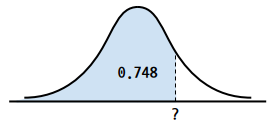

In [54]:
# 평균이 175, 표준편차가 15인 정규분포에서 누적확률이 0.748인 확률변수값을 반환합니다.
stats.norm.ppf(q = 0.748, loc = 175, scale = 15) #q:quantile

185.023

In [55]:
# 평균이 175, 표준편차가 10인 정규분포에서 누적확률이 0.841인 확률변수값을 반환합니다.
stats.norm.ppf(q = 0.841, loc = 175, scale = 10)

184.986

In [10]:
# 평균이 175, 표준편차가 5인 정규분포에서 누적확률이 0.977인 확률변수값을 반환합니다.
stats.norm.ppf(q = 0.977, loc = 175, scale = 5)

184.977

### ● (재미삼아) 20대 후반 남자 키가 평균이 175, 표준편차는 5인 정규분포를 따를 때 상위 5%인 남자 키는 
### 몇 cm 이상일까요? 상위 1%인 남자 키도 알아봅시다

In [57]:
# (재미삼아) 평균이 175, 표준편차가 5인 정규분포에서 상위 5%인 남자의 키를 확인합니다.
stats.norm.ppf(q = 0.95, loc = 175, scale = 5)

183.224

In [58]:
# (재미삼아) 평균이 175, 표준편차가 5인 정규분포에서 상위 1%인 남자의 키를 확인합니다.
stats.norm.ppf(q = 0.99, loc = 175, scale = 5)

186.632

## 왜도와 첨도

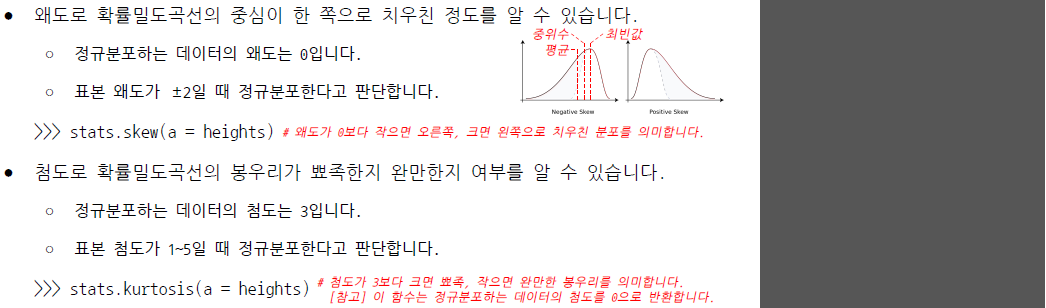

## 정규성 검정

### ● 5천 건 이하인 데이터의 정규성 검정은 사피로-윌크 검정을 실행합니다

In [11]:
stats.shapiro(x = heights) # 정규성 검정의 귀무가설은 '데이터가 정규분포한다'입니다
# 유의활률(p-value)이 유의수준 0.05보다 크면 정규분포한다고 판단합니다.

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

### ● 5천 건을 초과하는 가상의 키 데이터를 생성합니다

In [70]:
np.random.seed(seed = 1234)
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [12]:
# shapiro() 함수에 5천 건을 초과하는 데이터를 넣고 실행하면 반환되는 
# 유의확률이 정확하지 않다는 경고를 출력합니다.
stats.shapiro(x = heights)
# 정규분포하지 않음

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

### ● 5천 건을 초과하는 데이터의 정규성 검정은 앤더슨-달링 검정을 실행합니다

In [73]:
# 5천 건을 초과하는 데이터의 정규성 검정은 앤더슨-달링 검정을 실행합니다.
# [참고] 유의확률 대신 임계치를 반환합니다.
stats.anderson(x = heights)
# 앤더슨-달링 검정의 귀무가설도 '데이터가 정규분포한다'입니다.
# [참고] 유의확률 대신 임계치(critical values)를 반환합니다.

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## [참고] 정규성 검정

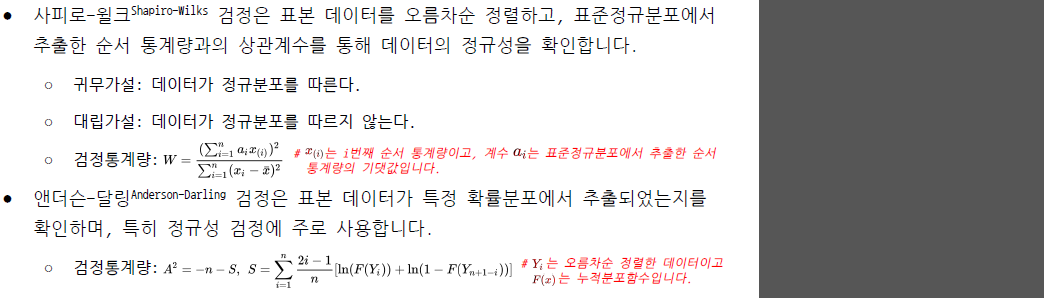

## 데이터 정규화

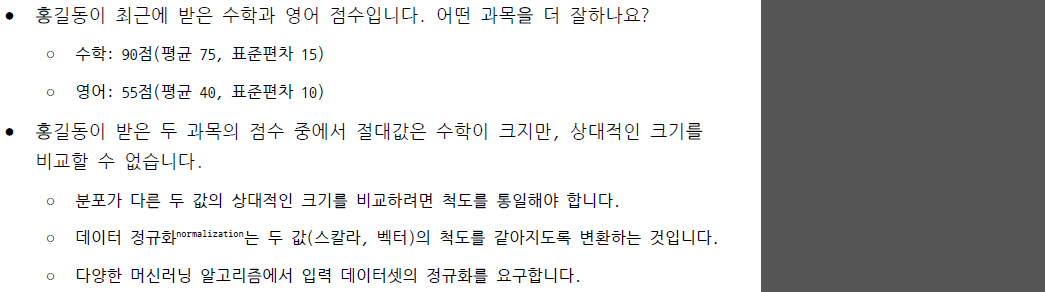

## 표준정규분포

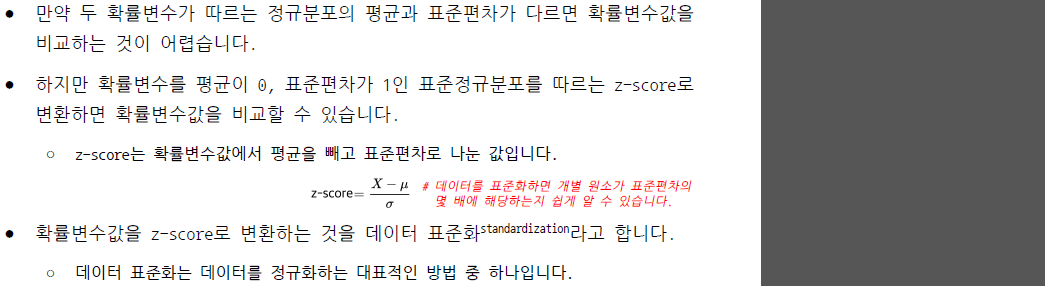

## 표준정규분포의 예시

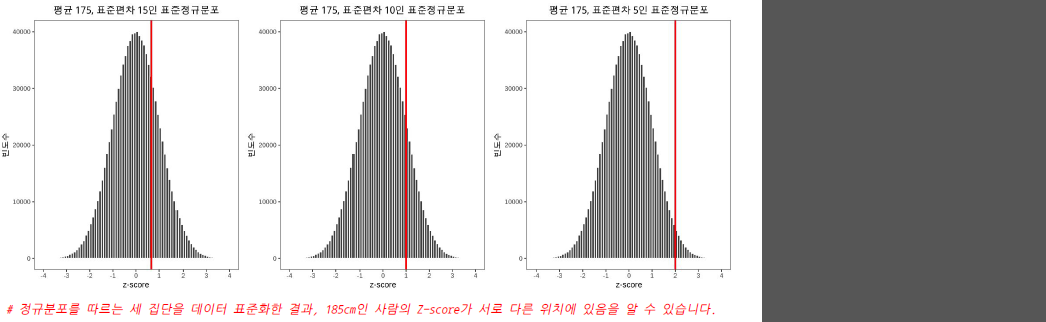

## 데이터 표준화

### ● 데이터를 표준화하는 함수를 생성합니다

In [13]:
def scale(x, loc, scale):
    return (x - loc) / scale

### ● 다양한 정규분포를 따르는 관측값을 표준화하고 크기를 비교합니다

In [75]:
# 평균이 175, 표준편차가 15인 정규분포에서 확률변수값 185의 표준화된 값을 반환합니다.
scale(x = 185, loc = 175, scale = 15)

0.667

In [76]:
# 평균이 175, 표준편차가 10인 정규분포에서 확률변수값 185의 표준화된 값을 반환합니다.
scale(x = 185, loc = 175, scale = 10)

1.000

In [77]:
# 평균이 175, 표준편차가 5인 정규분포에서 확률변수값 185의 표준화된 값을 반환합니다.
scale(x = 185, loc = 175, scale = 5)

2.000

## [참고] 이상치 탐지 방법 비교

### ● [std] 표준화된 데이터의 절대값이 3을 초과할 때 이상치로 판단합니다

In [83]:
locs = np.where(np.abs(stats.zscore(a = heights)) > 3) # 표준화된 데이터의 절대값이 3을 초과하는 인덱스를 locs에 할당합니다.
# np.where() 함수는 조건이 True인 인덱스를 정수로 반환합니다.

In [14]:
heights[locs]
# 평균과 표준편차 기준에서 이상치로 보이는 원소를 출력합니다.

NameError: name 'locs' is not defined

### ● [mad] 평균과 표준편차 대신 중위수와 중위수절대편차를 이용한 방법입니다

In [ ]:
#sns.scatterplot(x=height.index, y=height, s=10, fc='1', ec='0', alpha=0.2)
#plt.axhline(y=175, color'red', lw=2, ls='-')
#plt.axhline(y=175, color'red', lw=0.5, ls='--')
#plt.axhline(y=175, color'red', lw=0.5, ls='--')
# 왜 안되지;;;;

In [101]:
med = np.median(a = heights) # 중위수를 med에 할당합니다.

In [102]:
mad = robust.mad(a = heights) # 중위수절대편차를 mad에 할당합니다.

In [106]:
locs = np.where(np.abs((heights - med) / mad) > 3) # 중위수와 중위수절대편차로 정규화된 값이 3을 초과하는 인덱스를 locs에 할당합니다.

In [107]:
heights[locs] # 중위수와 중위수절대편차 기준에서 이상치로 보이는 원소를 출력합니다.

array([157.182, 190.628, 190.548, 155.596, 158.613, 191.103, 160.277,
       158.832, 160.279, 157.826, 160.072, 159.918, 159.246, 190.006,
       158.679, 157.003, 160.031, 158.681, 160.142, 159.258, 191.439,
       158.343, 155.707, 190.188, 160.236, 159.739])

## x^2(카이스퀘어) 분포

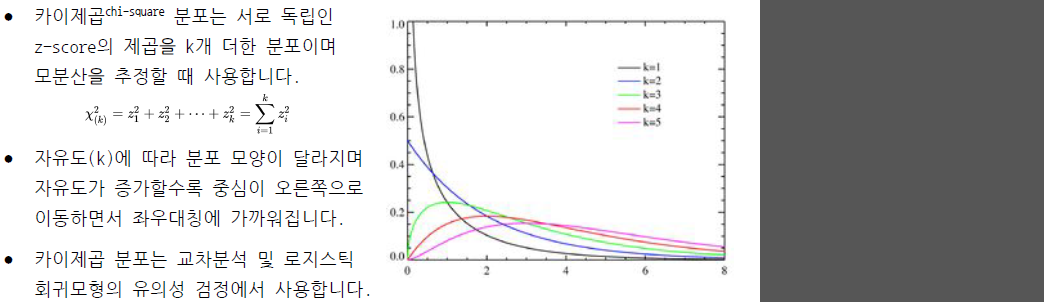

## F 분포

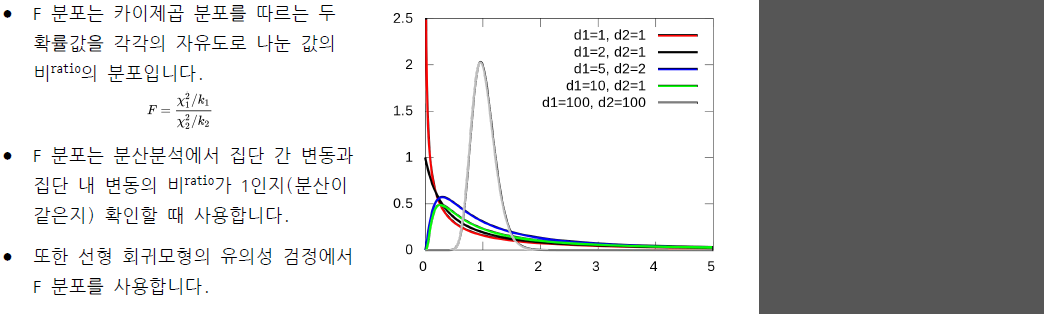

## 스튜던트 t 분포

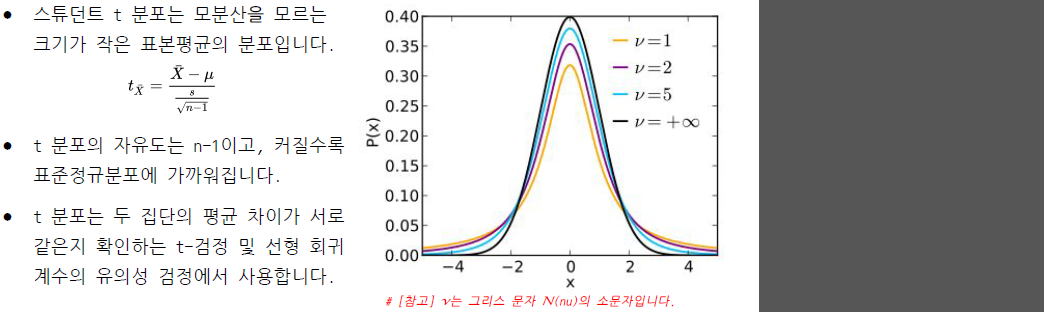

## [참고] 자유도의 이해

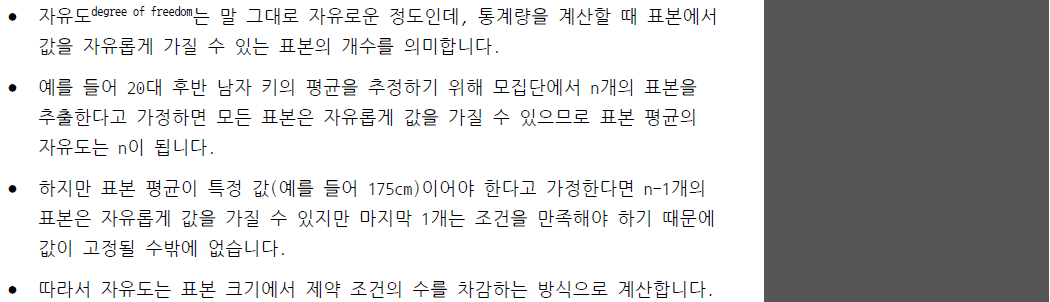

## End of Document